In [328]:
# impor the libraries 
import pandas as pd 
from sklearn.linear_model  import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [329]:
# read data from the csv file 
data = pd.read_csv("dataset/Dataset.csv",sep=",")

In [330]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [331]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [332]:
# row and column in the dataset 
data.shape

(506, 13)

In [333]:
# define the features and target variable 
features = ['LSTAT','CRIM','NOX','TAX','PTRATIO','CHAS','DIS'] # features 
target = 'MEDV' # target| response 

In [334]:
#extract the data 
dataset = data[[*features,target]]

In [335]:
dataset.head()

,LSTAT,CRIM,NOX,TAX,PTRATIO,CHAS,DIS,MEDV
0,4.98,0.00632,0.538,296,15.3,0,4.0900,24.0
1,9.14,0.02731,0.469,242,17.8,0,4.9671,21.6
2,4.03,0.02729,0.469,242,17.8,0,4.9671,34.7
3,2.94,0.03237,0.458,222,18.7,0,6.0622,33.4
4,5.33,0.06905,0.458,222,18.7,0,6.0622,36.2


In [336]:
dataset.shape

(506, 8)

In [337]:
from sklearn.preprocessing import StandardScaler
#normalize the datset
scaler = StandardScaler()
features_df = pd.DataFrame(scaler.fit_transform(dataset[features]),columns=features)
normalized_dataset = dataset.copy()
normalized_dataset[features] = features_df

In [338]:
normalized_dataset.head()

,LSTAT,CRIM,NOX,TAX,PTRATIO,CHAS,DIS,MEDV
0,-1.075562,-0.419782,-0.144217,-0.666608,-1.459000,-0.272599,0.140214,24.0
1,-0.492439,-0.417339,-0.740262,-0.987329,-0.303094,-0.272599,0.557160,21.6
2,-1.208727,-0.417342,-0.740262,-0.987329,-0.303094,-0.272599,0.557160,34.7
3,-1.361517,-0.416750,-0.835284,-1.106115,0.113032,-0.272599,1.077737,33.4
4,-1.026501,-0.412482,-0.835284,-1.106115,0.113032,-0.272599,1.077737,36.2


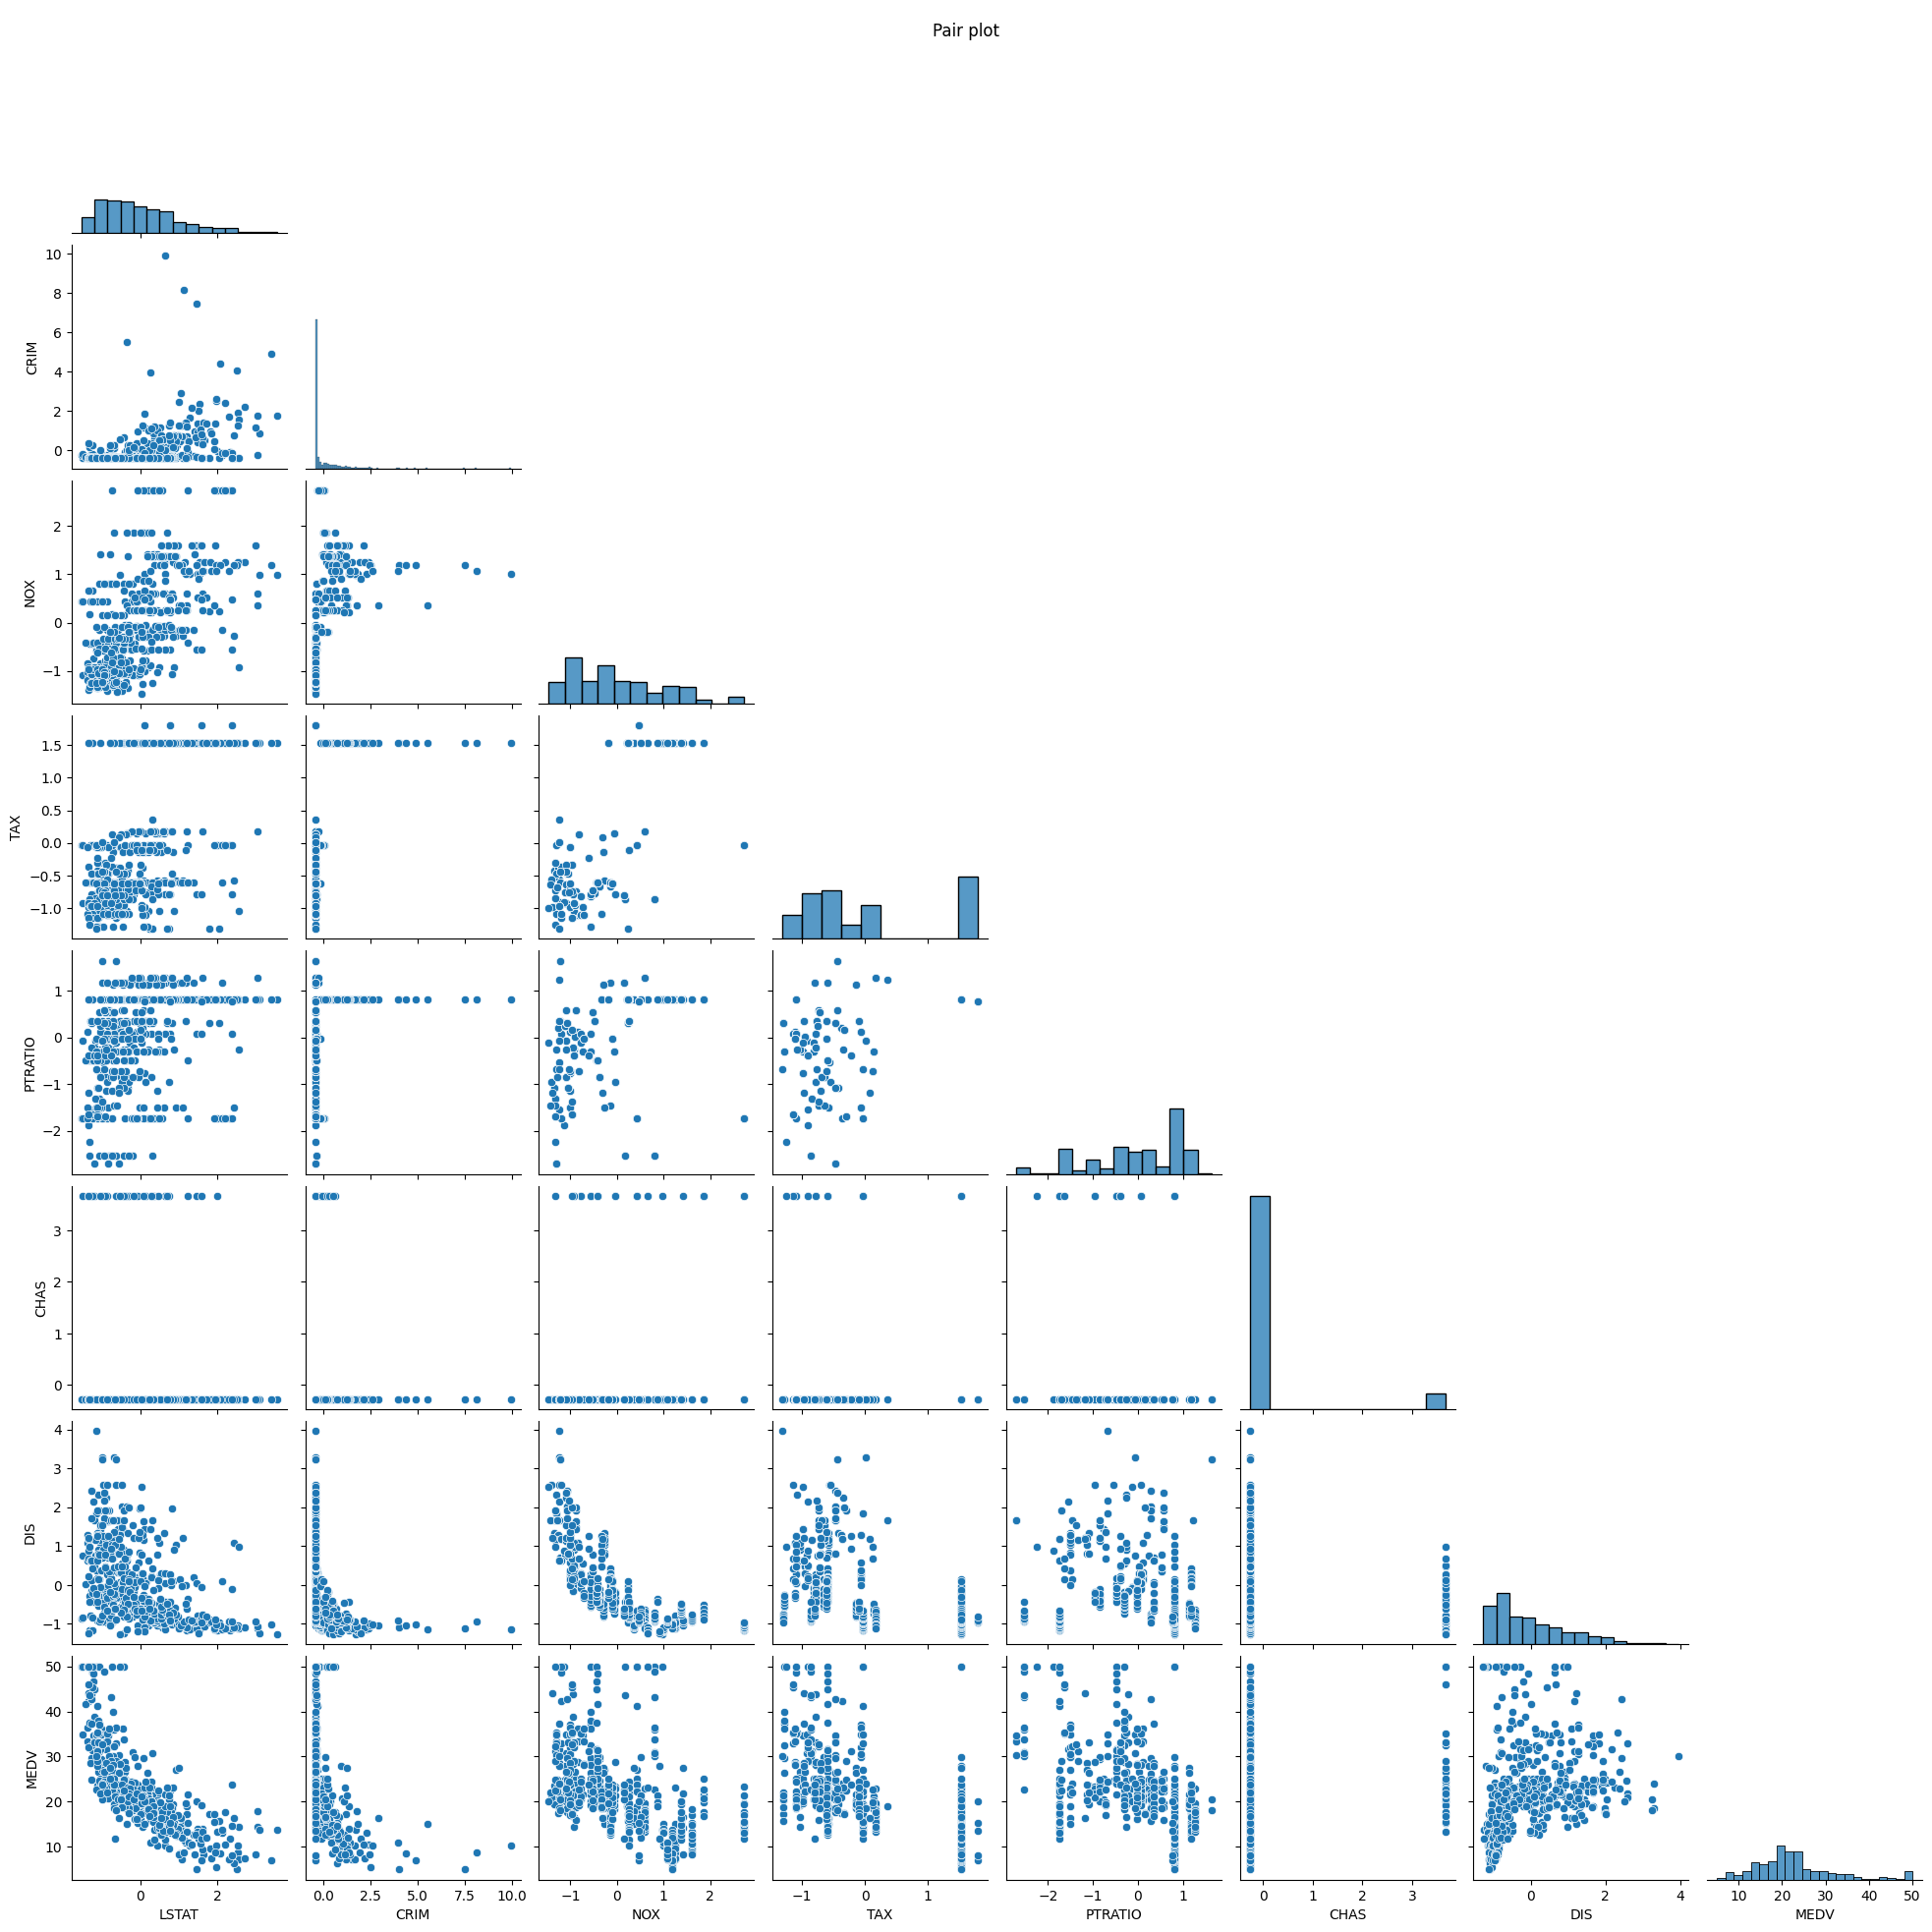

In [339]:
import seaborn as sns
# pair plot 
pair_plot = sns.pairplot(normalized_dataset,corner=True,height=2.5)
plt.suptitle("Pair plot")
num_vars = len(pair_plot.axes)
plt.show()



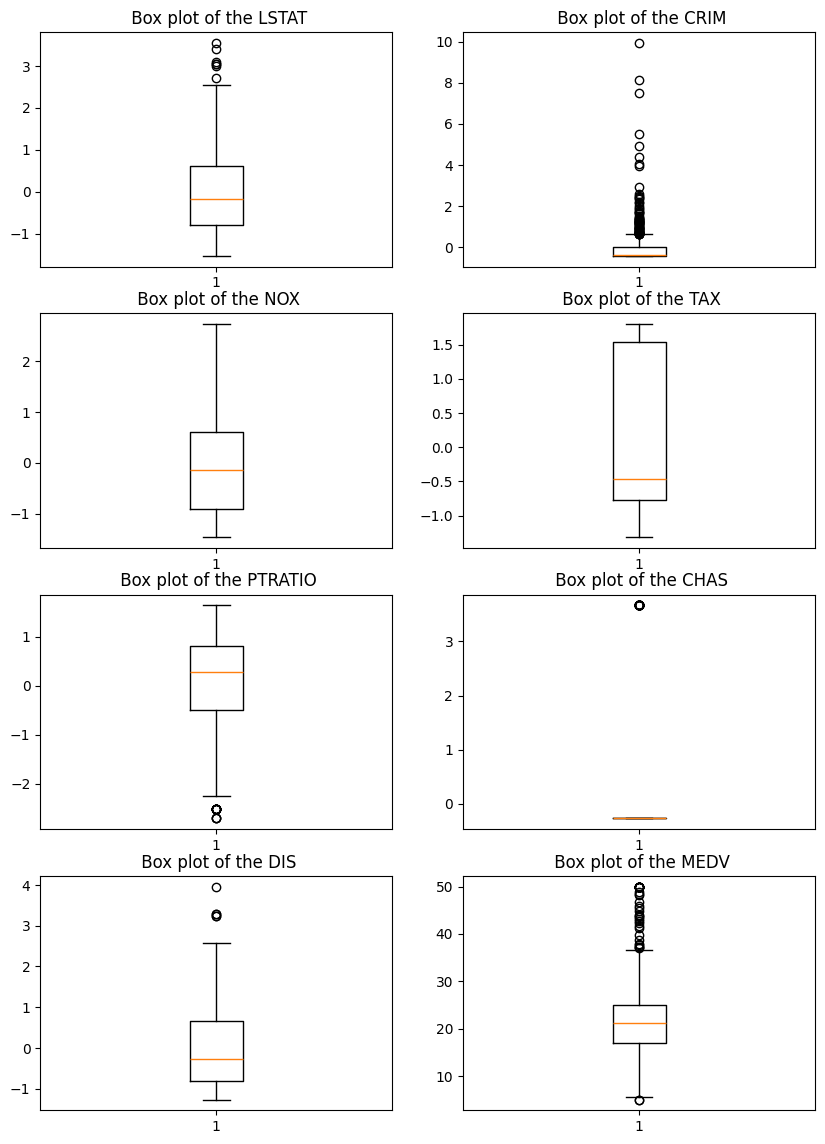

In [340]:
# draw the box plot of independent variable 
fig,axes = plt.subplots(ncols=2,nrows=4,figsize=(10,14))
# Flatten the axes array to iterate over it easily
axes = axes.flatten()
for ax,col_name in zip(axes,normalized_dataset.columns):
    ax.boxplot(x=normalized_dataset[col_name])
    ax.set_title(f" Box plot of the {col_name}")
plt.show()

In [341]:
# calcuate the quartiles 
q1= normalized_dataset.quantile(q=0.25)
q3 = normalized_dataset.quantile(q=0.75)
q1,q3

(LSTAT      -0.799420
 CRIM       -0.410970
 NOX        -0.913029
 TAX        -0.767576
 PTRATIO    -0.488039
 CHAS       -0.272599
 DIS        -0.805688
 MEDV       17.025000
 Name: 0.25, dtype: float64,
 LSTAT       0.603019
 CRIM        0.007397
 NOX         0.598679
 TAX         1.530926
 PTRATIO     0.806576
 CHAS       -0.272599
 DIS         0.662371
 MEDV       25.000000
 Name: 0.75, dtype: float64)

In [342]:
# calculate inter-quartile range 
iqr = q3-q1
iqr

LSTAT      1.402439
CRIM       0.418366
NOX        1.511708
TAX        2.298502
PTRATIO    1.294615
CHAS       0.000000
DIS        1.468059
MEDV       7.975000
dtype: float64

In [343]:
#calculate the cut off value 
cutoff_low = q1-(1.5*iqr)
cutoff_high = q3 + (1.5*iqr)
cutoff_low,cutoff_high

(LSTAT     -2.903078
 CRIM      -1.038519
 NOX       -3.180590
 TAX       -4.215330
 PTRATIO   -2.429962
 CHAS      -0.272599
 DIS       -3.007776
 MEDV       5.062500
 dtype: float64,
 LSTAT       2.706677
 CRIM        0.634946
 NOX         2.866241
 TAX         4.978680
 PTRATIO     2.748498
 CHAS       -0.272599
 DIS         2.864459
 MEDV       36.962500
 dtype: float64)

In [344]:
# mask for filtering the dataset 
mask = (normalized_dataset>=cutoff_low)  & (normalized_dataset<=cutoff_high)

In [345]:
#filter the dataset 
# filter_data = normalized_dataset[mask.all(axis=1)] # removing the outliers 
filter_data = normalized_dataset # without removing the outliers

In [346]:
filter_data.shape

(506, 8)

In [347]:
# correlation matrix 
corr_matrix = normalized_dataset.corr()
corr_matrix

,LSTAT,CRIM,NOX,TAX,PTRATIO,CHAS,DIS,MEDV
LSTAT,1.000000,0.455621,0.590879,0.543993,0.374044,-0.053929,-0.496996,-0.737663
CRIM,0.455621,1.000000,0.420972,0.582764,0.289946,-0.055892,-0.379670,-0.388305
NOX,0.590879,0.420972,1.000000,0.668023,0.188933,0.091203,-0.769230,-0.427321
TAX,0.543993,0.582764,0.668023,1.000000,0.460853,-0.035587,-0.534432,-0.468536
PTRATIO,0.374044,0.289946,0.188933,0.460853,1.000000,-0.121515,-0.232471,-0.507787
CHAS,-0.053929,-0.055892,0.091203,-0.035587,-0.121515,1.000000,-0.099176,0.175260
DIS,-0.496996,-0.379670,-0.769230,-0.534432,-0.232471,-0.099176,1.000000,0.249929
MEDV,-0.737663,-0.388305,-0.427321,-0.468536,-0.507787,0.175260,0.249929,1.000000


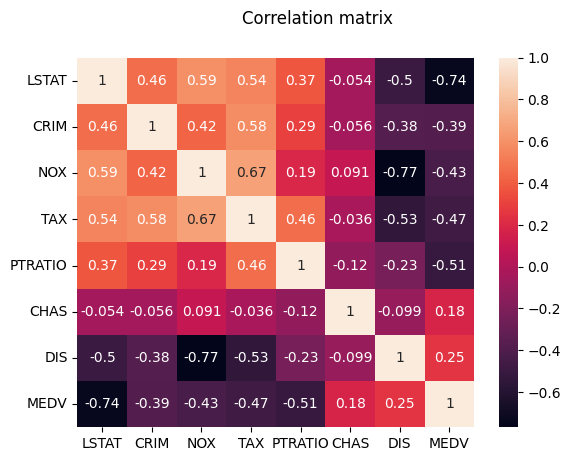

In [348]:
sns.heatmap(corr_matrix,annot=True)
plt.suptitle("Correlation matrix")
plt.show()

In [349]:
# extract the independent and dependent dataset

X = filter_data[features]
y = filter_data[target]

In [350]:
X.shape,y.shape

((506, 7), (506,))

In [351]:
# convert vector to 2d matrix 
# y = y.values.reshape(-1,1)

In [352]:
# train test selection 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [353]:
X_train.shape,X_test.shape

((404, 7), (102, 7))

In [354]:
# initalize the model 
model = LinearRegression()

In [355]:
# train the model 
model.fit(X_train,y_train)

LinearRegression()

In [356]:
# y-intercept and slope 
model.intercept_,model.coef_

(np.float64(22.53169963314465),
 array([-5.84053768, -0.66681097, -2.47594799,  0.33477467, -2.52641923,
         0.97930132, -3.1148823 ]))

In [357]:
#prediction on test data
y_pred = model.predict(X_test)

In [358]:
#evaluation of the model 
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2  = r2_score(y_test,y_pred)
mse,mae,r2

(np.float64(26.520315971973066),
 np.float64(3.5841683128454127),
 0.6383615459467826)

In [359]:
#evaluation of the model 
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2  = r2_score(y_test,y_pred)
mse,mae,r2

(np.float64(26.520315971973066),
 np.float64(3.5841683128454127),
 0.6383615459467826)

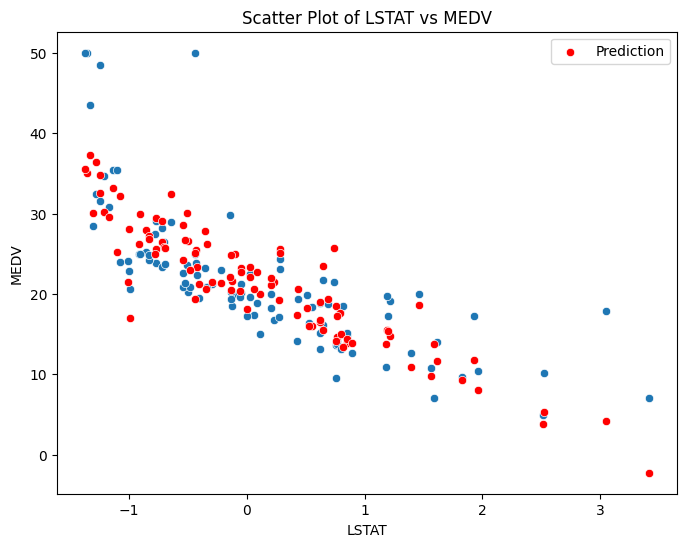

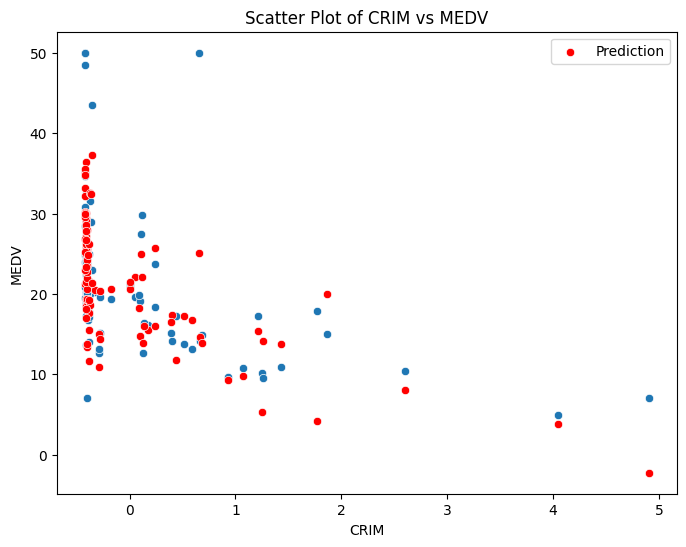

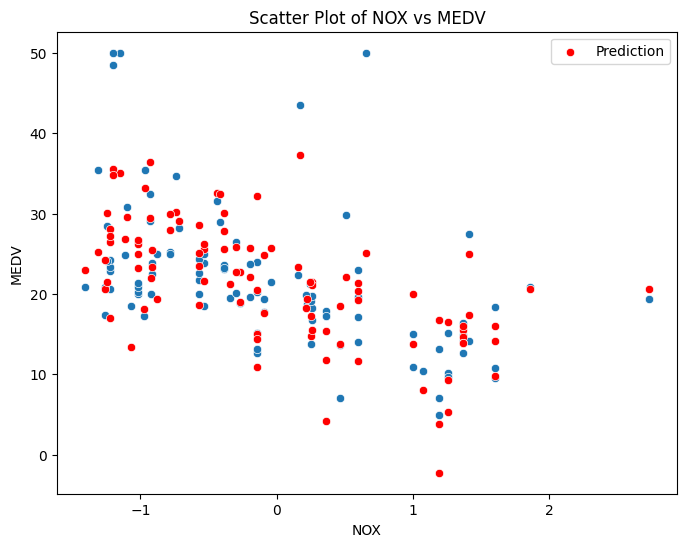

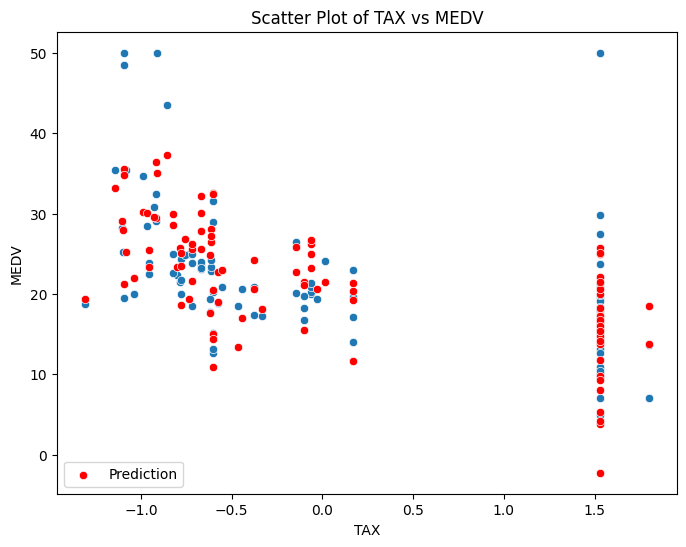

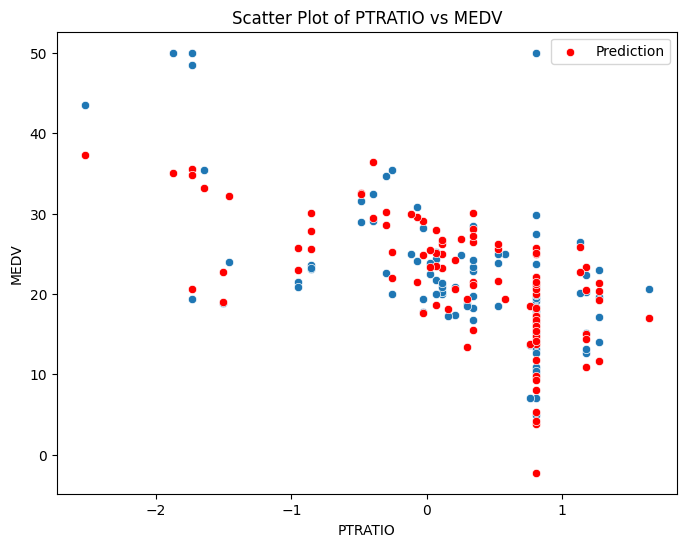

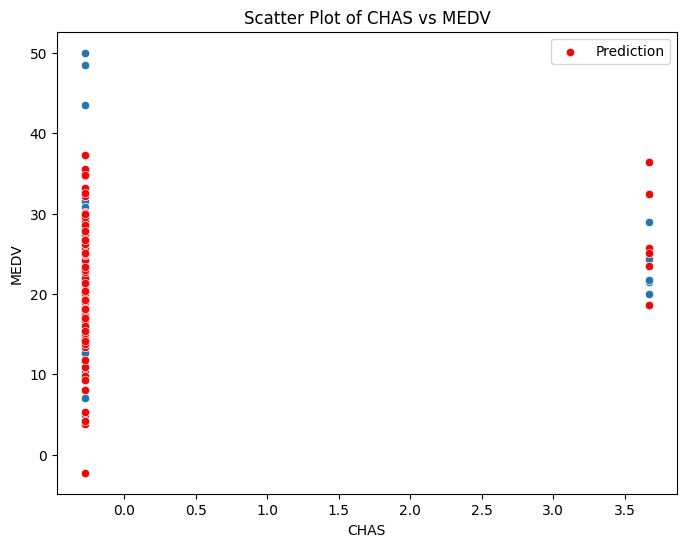

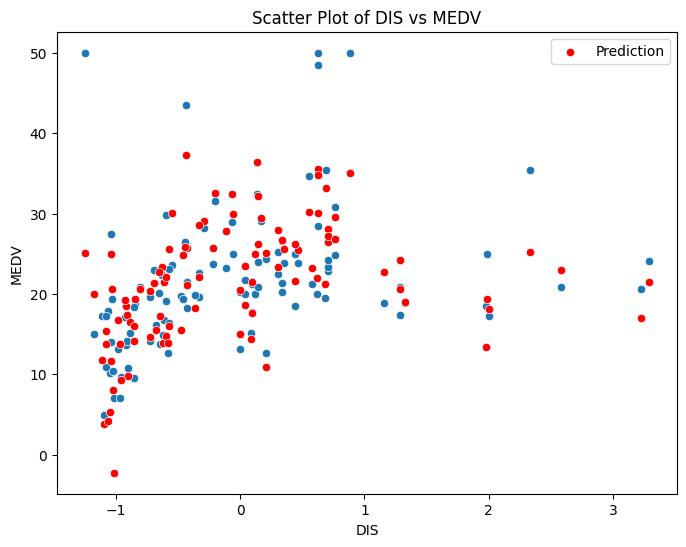

In [360]:
# Plotting scatter plots for each independent variable against the target variable
for column in features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_test[column], y=y_test)
    sns.scatterplot(x=X_test[column], y=y_pred, color='red',  label='Prediction')
    plt.title(f'Scatter Plot of {column} vs {target}')
    plt.xlabel(column)
    plt.ylabel(target)
    plt.show()

In [361]:
(X_test.columns)

Index(['LSTAT', 'CRIM', 'NOX', 'TAX', 'PTRATIO', 'CHAS', 'DIS'], dtype='object')

<h5>Non-Linear Regression</h5>

In [362]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [363]:
# initalize the pipeline model 
model = Pipeline(
  [  ('poly',PolynomialFeatures(degree=2)),
    ('linear',LinearRegression(fit_intercept=False))
]
)

In [364]:
model

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('linear', LinearRegression(fit_intercept=False))])

In [365]:
# train the model 
model.fit(X_train,y_train)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('linear', LinearRegression(fit_intercept=False))])

In [366]:
# predict on test data 
y_predict = model.predict(X_test)

In [367]:
#evaluate of the model 
mse = mean_squared_error(y_test,y_predict)
mae = mean_absolute_error(y_test,y_predict)
r2  = r2_score(y_test,y_predict)
mse,mae,r2


(np.float64(18.094915638029978),
 np.float64(2.92388136620615),
 0.7532526639397463)

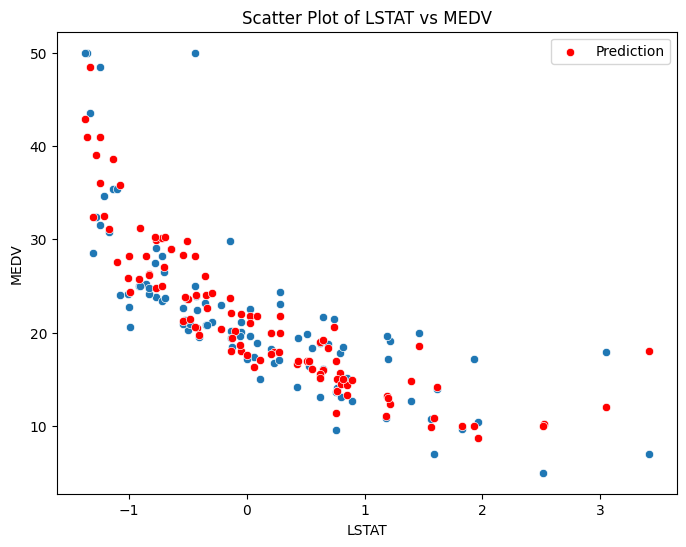

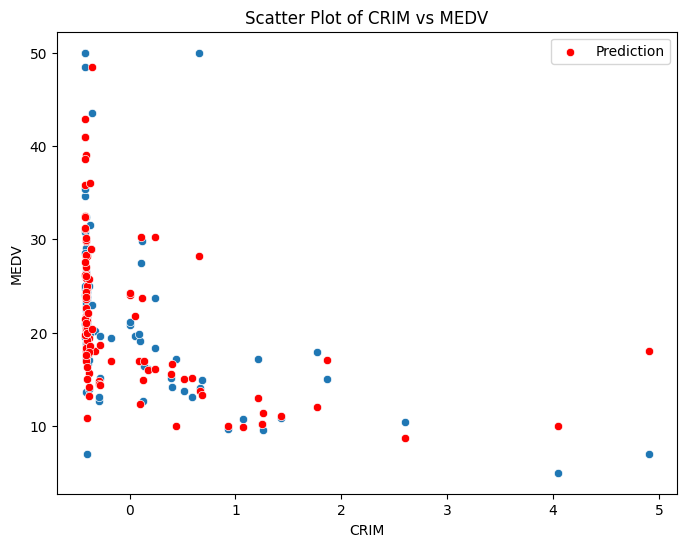

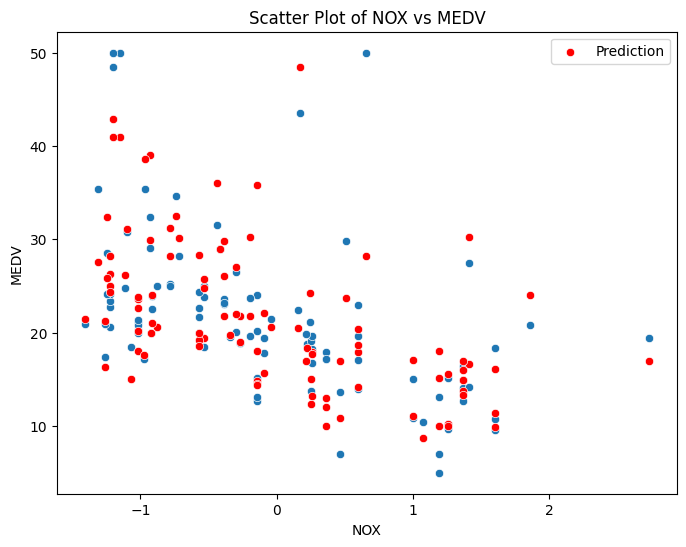

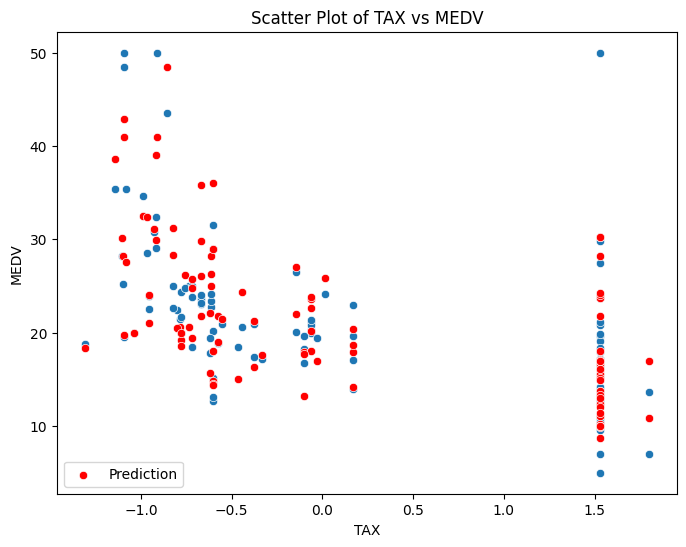

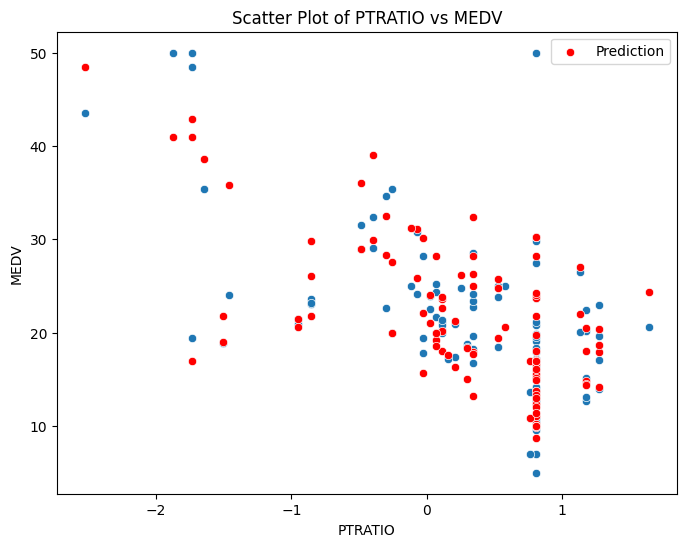

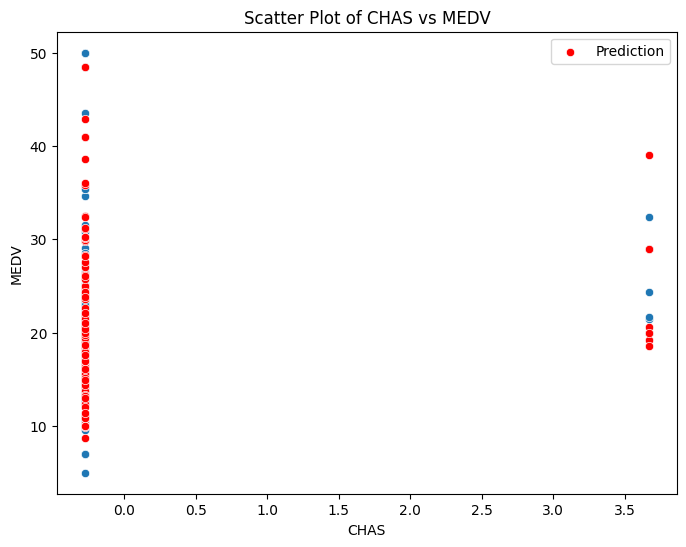

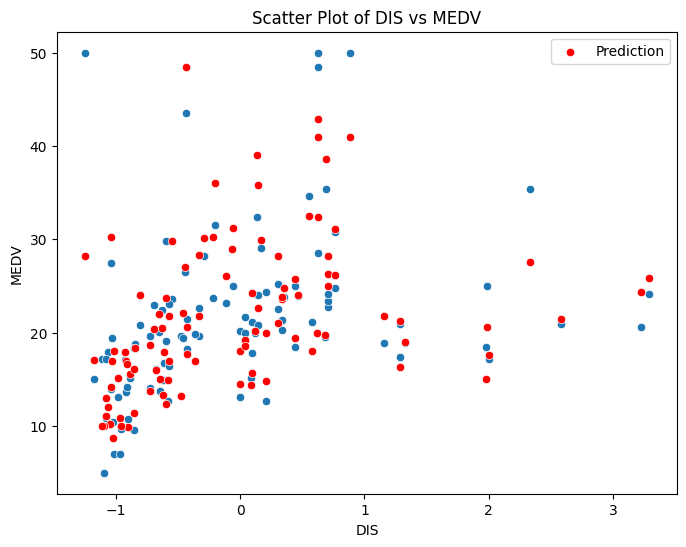

In [368]:
# Plotting scatter plots for each independent variable against the target variable
for column in features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_test[column], y=y_test)
    sns.scatterplot(x=X_test[column],y= y_predict, color='red',  label='Prediction')
    plt.title(f'Scatter Plot of {column} vs {target}')
    plt.xlabel(column)
    plt.ylabel(target)
    plt.show()

In [369]:

import joblib

# save the model 
joblib.dump(model,"poly_multi_reg.pkl")


['poly_multi_reg.pkl']

<h5>Non-linear regression</h5>
<b>With Outliers</b></br>
<p>
mse: 18.094915638029978,</br>
mae: 2.92388136620615,</br>
r2_score: 0.7532526639397463</p>

<b>Without Outliers</b></br>
mse: 7.925700954883878,</br>
mae: 2.087058681911892,</br>
r2_score: 0.715128640873655</p>
